# Einheit 2 - Moderne Objekterkennung

## Inhalt der Einheit: Einführung in die Objekterkennung
- Faltungsneuronale Netzwerke - Moderne Objekterkennung
- VGG16
- Resnet
- MaskRCNN
- CLIP

## Faltungsneuronale Netzwerke - Moderne Objekterkennung

In dieser Einheit bauen wir auf die Ergebnisse der letzten Einheit auf, in welcher wir durch die Bewegung von Filtern eine Gesichtserkennung gebaut haben (Abschnitte Erweiterte Objekterkennung und Live Gesichterkennung mittels Filter). Hier verwenden wir so genannte Faltungsneuronale Netzwerke (CNNs), mit welchen diese Filter automatisch berechnet werden! Ihr müsst euch also um nichts kümmern, das Netzwerk findet automatisch heraus, wie es gut Objekte in Bildern erkennen kann.

Hierfür müssen wir als erstes neue Module installieren:

In [1]:
# Installation der neuen Module (wir verwenden Pytorch)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install scikit-image
%pip install pillow

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/openai/CLIP.git to c:\users\fhs38054\appdata\local\temp\pip-req-build-7j4x2ayl
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369594 sha256=409e477115502364fc1b53a2be13bd8cdb0bf1e604da9ca983f12053beaa84ba
  Stored in directory: C:\Users\fhs38054\AppData\Local\Temp\pip-ephem-wheel-cache-5xcs2vuq\wheels\c8\e4\e1\11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\fhs38054\AppData\Local\Temp\pip-req-build-7j4x2ayl'


  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.9 MB 11.8 MB/s eta 0:00:01
   ----------- ---------------------------- 3.7/12.9 MB 10.4 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 7.9 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.9 MB 7.1 MB/s eta 0:00:01
   --------------------- ------------------ 7.1/12.9 MB 6.8 MB/s eta 0:00:01
   -------------------------- ------------- 8.7/12.9 MB 6.8 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.9 MB 6.9 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.9 MB 6.5 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.9 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  12.8/12.9 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 6.1 MB/s eta 0:00:00
Using c

## Objekterkennung mit tiefen Neuronalen Netzwerken (VGG16)

VGG16 ist ein relativ altes (2014) Neuronales Netzwerk für die Objekterkennung in Bildern. Wir verwenden VGG um diese Objekte https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt automatisch in Bildern zu erkennen. Im Grunde ist unser Aufbau der gleiche wie letzte Einheit. Wir laden unsere module mittels:
```
import cv2
```

Danach starten wir die Kamera mit:
```
camera = cv2.VideoCapture(0)
```

Um nun Objekte in unserem Frame zu erkennen, müssen wir unseren Objekterkenner erstellen. Ich habe euch den Programmiercode hierfür vereinfacht. Ihr könnt den Objekterkenner so erstellen:
```
model = dlmodels.VGG16ObjectDetector() 
```

Für mehr Information über den Programmiercode des Objekterkenners könnt ihr im dlmodels.py nachschauen. Darauf folgend starten wir die Endlosschleife und laden den aktuellen Frame mittels:
```
while True:
    error, frame = camera.read()
    if not error:
        break
```

Jetzt können wir die Objekte in einem frame über model.predict vorhersagen. Diese sind nicht perfekt, gehen aber schon in die richtige Richtung:
``` 
    labels = model.predict(frame)
```

Abschließend schreiben wir Text auf unser Bild welches die am warscheindlichste Vorhersage ausgibt, geben den Frame aus und ermöglichen die Beendung der Aufnahme wenn die Taste q gedrückt wird. Nach der Endlosschleife geben wir die Kamera frei und schließen alle Fenster.

```
    cv2.putText(frame, labels[0], (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Und zeigen die Kamera an
    cv2.imshow("VGG16 - Top Vorhersage", frame)

    # Wenn die q Taste gedrückt wird, beenden wir die Endlosschleife
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()
```

In [2]:
# VGG16 Objekterkennung - Lösung
import cv2
import dlmodels

# Start der Camera
camera = cv2.VideoCapture(0)

# Start unseres DL Objekterkennungs Modells
model = dlmodels.VGG16ObjectDetector()  # VGG16 ist ein sehr einfaches, Neuronales Netzwerk für Objekterkennung

while True:
    error, frame = camera.read()
    if not error:
        break

    # Durch predict bekommen wir das vorhergesagte Label
    # Aufgabe: Verwende das Modell um die Vorhersage (Label) zu berechnen
    labels = model.predict(frame)  

    # Wir geben das Label links oben im Bild aus
    cv2.putText(frame, labels[0], (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Und zeigen die Kamera an
    cv2.imshow("VGG16 - Top Vorhersage", frame)

    # Wenn die q Taste gedrückt wird, beenden wir die Endlosschleife
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\fhs38054/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [01:33<00:00, 5.94MB/s]


Im oberem Beispiel geben wir nur die am besten passende Vorhersage aus. Das nennt man die Top-1 Prediction. Das ist oft nicht der beste Ansatz, da das Modell natürlich nicht perfekt ist. Manchmal ist es ein besserer Ansatz, die 5 am besten passenden Vorhersagen auszugeben. Hierfür könnt Ihr bei model.predict(frame, top5=True) angeben:
```
    labels = model.predict(frame, top5=True)
```

Da ihr jetzt nicht nur das beste Label bekommt sondern die 5 besten, müssen wir diese 5 Texte in unser Bild, der Reihe nach sortiert, einfügen.
```
    for i, label in enumerate(labels):
        cv2.putText(frame, label, (10, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
```

Hierfür machen wir die Schrift etwas kleiner (0.6 anstelle von 1) und gehen jedes mal wenn wir Text einfügen, etwas weiter nach unten im Bild (10, 30 + i * 30).

Gerne könnt ihr in dlmodel.py ausprobieren, was passiert wenn ihr anstelle top-5, top-10 ausgebt.

In [3]:
# VGG16 Top5 Objekterkennung - Lösung
import cv2
import dlmodels

camera = cv2.VideoCapture(0)
model = dlmodels.VGG16ObjectDetector()

while True:
    error, frame = camera.read()
    if not error:
        break

    # Anstelle das am eheste Objekt auszugeben, geben wir die 5 Warscheindlichsten aus
    labels = model.predict(frame, top5=True)

    # Und geben alle 5, der Reihe nach sortiert, aus
    for i, label in enumerate(labels):
        cv2.putText(frame, label, (10, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Show camera feed
    cv2.imshow("VGG16 - Top 5 Vorhersage", frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


## Objekterkennung mit tiefen Neuronalen Netzwerken (ResNet-50)

ResNet ist eine Verbesserung von VGG16, und ist in mehreren Stufen verfügbar. Hier verwenden wir ResNet-50. Um dieses zu verwenden kann 
```
model = dlmodels.RestNet50ObjectDetector()
```

verwendet werden. Der Code wurde von mir so vorbereitet, das der Rest genau gleich wie beim VGG Beispiel verwendet werden kann.

In [4]:
# ResNet-50 Objekterkennung - Lösung
import cv2
import dlmodels

camera = cv2.VideoCapture(0)
# Anstelle von VGG verwenden wir hier das tieferen und für gewöhnlich besser funktionierende ResNet 50
model = dlmodels.RestNet50ObjectDetector()

while True:
    error, frame = camera.read()
    if not error:
        break

    labels = model.predict(frame) 

    cv2.putText(frame, labels[0], (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("ResNet-50 - Top Vorhersage", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\fhs38054/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:16<00:00, 6.04MB/s]


Ich habe für ResNet-50 ebenfalls die Top-5 vorhersage programmiert.

In [5]:
# ResNet-50 Top-5 Objekterkennung - Lösung
import cv2
import dlmodels

camera = cv2.VideoCapture(0)
model = dlmodels.RestNet50ObjectDetector()

while True:
    error, frame = camera.read()
    if not error:
        break

    labels = model.predict(frame, top5=True)  

    for i, label in enumerate(labels):
        cv2.putText(frame, label, (10, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow("ResNet50 - Top 5 Vorhersage", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


ResNet-152 ist eine um einiges besserer Objekterkenner als ResNet-50. Der folgende Code verwendet 
```
model = dlmodels.RestNet152ObjectDetector()
```

als Modell um Objekte zu erkennen.

In [11]:
import cv2
import dlmodels

camera = cv2.VideoCapture(0)
model = dlmodels.RestNet152ObjectDetector()

while True:
    error, frame = camera.read()
    if not error:
        break

    labels = model.predict(frame, top5=True)  

    for i, label in enumerate(labels):
        cv2.putText(frame, label, (10, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.imshow("ResNet152 - Top 5 Vorhersage", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


## MaskRCNN

VGG und ResNet können zwar Objekte erkennen, aber nicht darstellen wo diese Objekte gefunden wurden. MaskRCNN kann einerseits Objekte erkennen und gibt andererseits an, wo diese Objekte gefunden wurden. Da MaskRCNN sehr viele Objekte gleichzeitig erkennt, ist dieses leider sehr langsam (das Bild wird in diesem Beispiel also sehr langsam sein).

Ein wichtiger Teil dieses Beispiels ist der Schwellenwertparameter (threshold). Nur wenn sich das Modell sicherer ist wie dieser threshold, wird das Objekt auch als solches erkannt.

In [7]:
import cv2
import torch
import dlmodels
import torchvision

# Objekte welche über MaskRCNN erkannt werden können
COCO_CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 
    'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet',
    'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush',
    'hairbrush'
]

# Der Wert (in %) welcher geprüft wird um ein Objekt zu erkennen. 0 sind 0%, 1 sind 100%, 0.5 stehen für 50%
threshold = 0.8  # Das Modell muss sich mindestens zui 80% sicher sein um ein Objekt zu erkennen.

# Aufgabe: Spielt euch ein bisschen mit dem Threshold. Was passiert wenn dieser näher 1 und näher 0 geht?

# Laden des vortrainierten Mask R-CNN Modells
model = dlmodels.MaskRCNN()  # Wir geben dem Modell die Objekte und den Schwellenwert

camera = cv2.VideoCapture(0)

while True:
    error, frame = camera.read()
    if not error:
        break

    gefundenePositionen, Labels, Warscheindlichkeit = model.predict(frame)

    # Hier untersuchen wir jedes gefundene Objekt ...
    for i in range(len(gefundenePositionen)):
        # ... darauf ob die Warscheindlichkeit das es tatsächlich dieses Objekt ist ...
        if Warscheindlichkeit[i] > threshold:
            # ... und holen uns die Start und End Positionen des gefundenen Objektes ...
            x1, y1, x2, y2 = map(int, gefundenePositionen[i])
            label_id = Labels[i]

            # ... zeichnen ein Rechteck rundherum und fügen einen Text darüber ein.
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label_id}_{COCO_CLASSES[label_id-1]}: {Warscheindlichkeit[i]:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Abschließend zeigen wir das Bild mit allen Rechtecken und Texten an.
    cv2.imshow("Mask R-CNN", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

## CLIP

CLIP ist ein Modell das es uns ermöglicht, die Ähnlichkeit zwischen Bildern und Texten zu berechnen.
Ein Bild welches einen Hund zeigt, ist für dieses Modell näher zu einem Text "Das ist ein Hund" als ein Text "Pferd läuft über die Wiese".

CLIP ist ein Modell, welches Bilder und Texte bearbeiten kann. Es ist darauf ausgelegt, die Ähnlichkeit von diesen Bildern und Texten heruaszufinden. Um CLIP zu verwenden könnt ihr:
```
model = dlmodels.ClipObjectAndTextEmbedding()
```

verwenden. CLIP verwendet ResNet-50 im Hintergrund zur Erkennung von Bildern und Transformer (die Technologie hinter ChatGPT) für die Texterkennung. Für dieses Beispiel verwenden wir Demo-Daten, welche wir über: 
```
bilder, originalBilder = model.loadImages(namen)
```

geladen und über:
```
model.showImages(originalBilder, beschreibungen)
```

dargestellt werden können.

Mögliche Clip Embeddings: ['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']
Wir wählen: "ViT-B/32"


100%|███████████████████████████████████████| 338M/338M [01:15<00:00, 4.67MiB/s]


Bild Größe: 224
Text Context Länge: 77
Bekannte Wörter des Modells: 49408


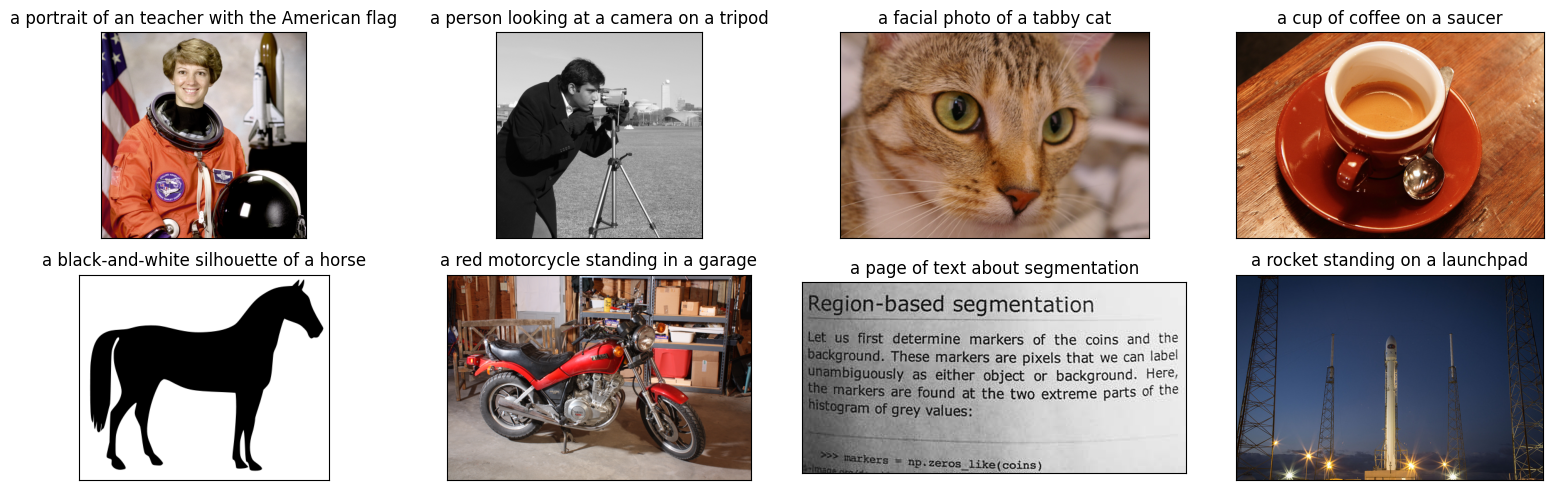

In [8]:
import cv2
import torch
import dlmodels
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Wenn ihr eine GPU verbaut habt, könnt ihr hier device = "cuda" wählen, dann läuft alles viel schneller!
device = "cpu"
# Hier laden wir unser Clip Modell. Wenn es fertig geladen ist gibt es uns einige Sachen aus. 
# Wie groß sind die Bilder die dem Modell übergeben werden können, wie lange kann Text sein und wie viele Wörter kennt das Modell.
model = dlmodels.ClipObjectAndTextEmbedding(device)

# Wir laden jetzt 8 Bilder und vergleichen diese mittels Clip. Clip ermöglicht es uns, Texte und Bilder zu vergleichen, sprich zu schauen, wie gut Bilder und Texte zusammenpassen
namen = ["astronaut","camera","chelsea","coffee","horse","motorcycle_right","page","rocket"]
beschreibungen = [
    "a portrait of an teacher with the American flag",
    "a person looking at a camera on a tripod",
    "a facial photo of a tabby cat",
    "a cup of coffee on a saucer",
    "a black-and-white silhouette of a horse",
    "a red motorcycle standing in a garage", 
    "a page of text about segmentation",
    "a rocket standing on a launchpad"
]

# Laden der Bilder
bilder, originalBilder = model.loadImages(namen)
# Zeigen der Bilder
model.showImages(originalBilder, beschreibungen)

Um die Ähnlichkeit der Bilder und Texte zu berechnen kann
```
similarity = model.calculateSimilarity(bilder, beschreibungen)
```

verwendet werden. Mittels 
```
model.plotSimilarity(originalBilder, beschreibungen, similarity)
```

werden diese Bilder, Texte und Ähnlichkeiten ausgegeben.

tensor([[49406,  6850,   334,   256,  9131,   619,  7801,   542,  8478,   651,
          3130,   286, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)


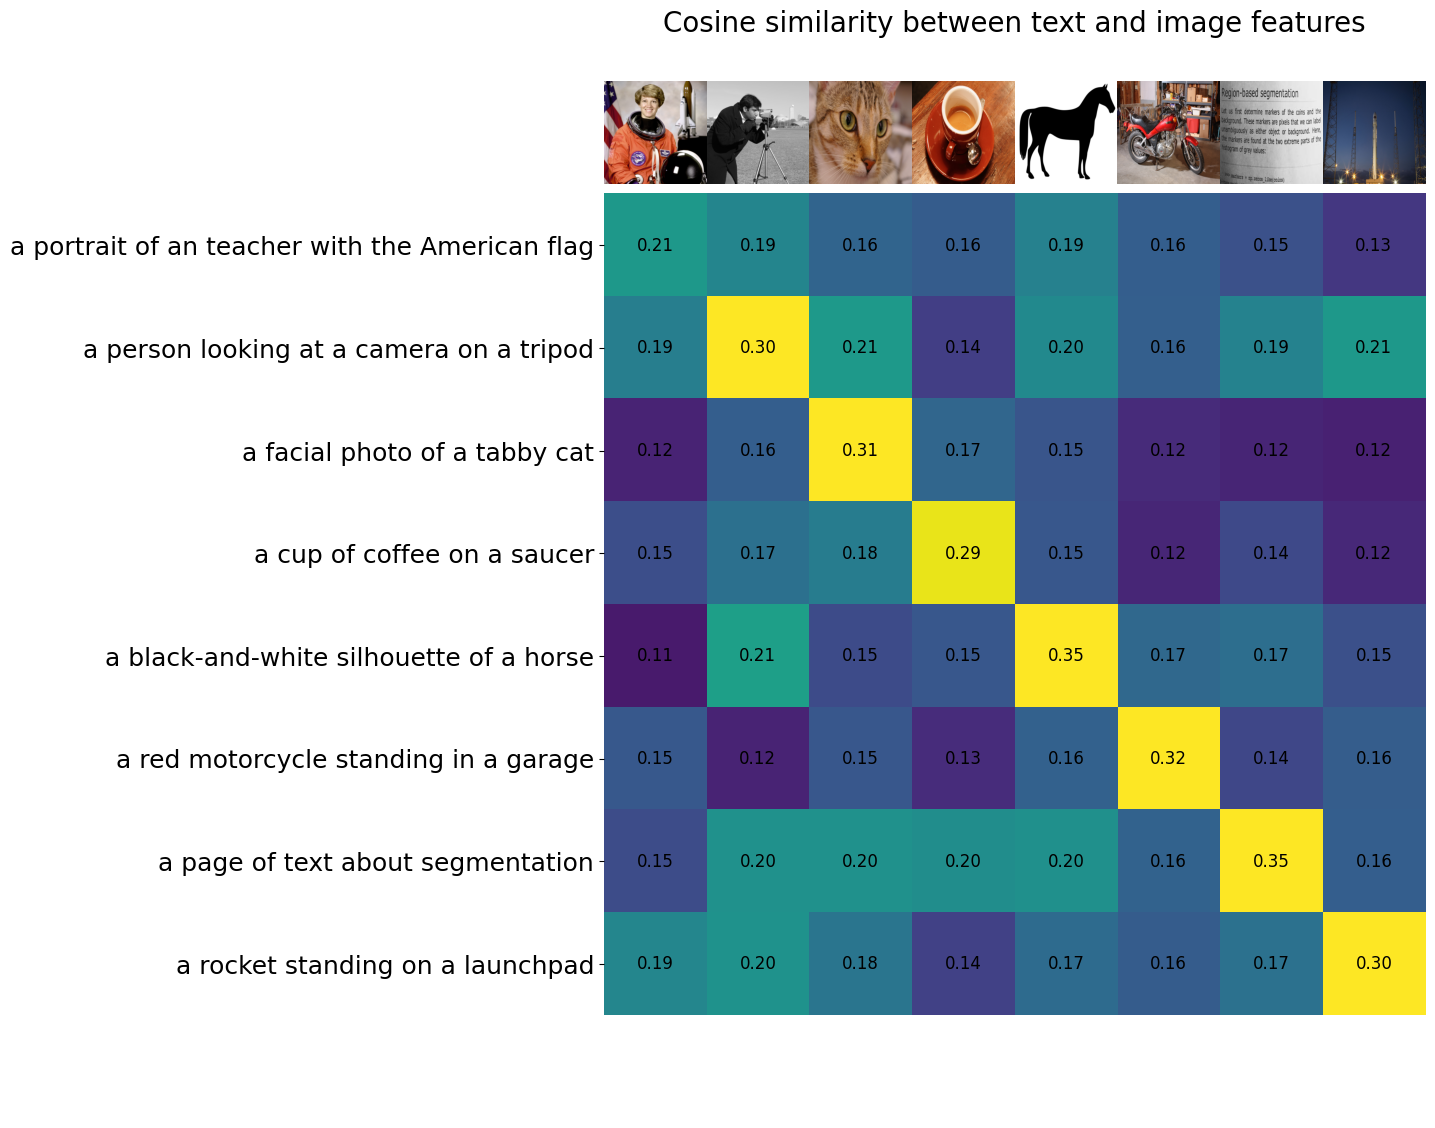

In [9]:
# Da Clip nicht nur Bilder sondern auch Text versteht können wirskimage.data_dir uns ansehen wie Clip unseren Text interpretiert.
print(model.tokenize("Hallo! Wie geht es dir heute?"))

# Berechnen der Ähnlichkeit zwischen Bilder und Texte
similarity = model.calculateSimilarity(bilder, beschreibungen)
model.plotSimilarity(originalBilder, beschreibungen, similarity)

# Mehr hier: https://colab.research.google.com/github/openai/clip/blob/master/notebooks/Interacting_with_CLIP.ipynb#scrollTo=NSSrLY185jSf

In [10]:
import cv2
import dlmodels

camera = cv2.VideoCapture(0)
# Wenn ihr eine GPU verbaut habt, könnt ihr hier device = "cuda" wählen, dann läuft alles viel schneller!
device = "cpu"
# Hier laden wir unser Clip Modell.
model = dlmodels.ClipObjectAndTextEmbedding(device)

# Aufgabe: Probiert unterschiedliche Texte aus!
comparisonTexts = ["A person looking straight at you", "a human holding a Fork", "A person standing with fruit in its hands", "an empty room", "a room with people working"]

while True:
    error, frame = camera.read()
    if not error:
        break

    frameForClip = model.processImage(frame)
    similarity = model.calculateSimilarity(frameForClip, comparisonTexts)

    # Sortieren der Ähnlichkeiten und Texte
    sorted_texts = sorted(zip(comparisonTexts, similarity), key=lambda x: x[1], reverse=True)
    
    best_match = sorted_texts[0][0]
    cv2.putText(frame, best_match, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    cv2.imshow("CLIP - Ähnlichster Text", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


Mögliche Clip Embeddings: ['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']
Wir wählen: "ViT-B/32"
Bild Größe: 224
Text Context Länge: 77
Bekannte Wörter des Modells: 49408
